# Stock Price Prediction on Daily Stock Data
using Deep Neural Networks


In [7]:
# Part 1: Import Libraries and Download Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, Flatten
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from google.colab import files
uploaded = files.upload()


Saving dataset_zhou.csv to dataset_zhou (1).csv


In [9]:
data = pd.read_csv("dataset_zhou.csv")

In [10]:
TARGET = 'Low' # Open, High, Low, CLose
data = data[['Date', 'Open', 'High', 'Low', 'Close']]
data.head()

,Date,Open,High,Low,Close
0,1/23/2001,2642.330078,2738.810059,2618.719971,2730.050049
1,1/24/2001,2732.919922,2771.629883,2692.810059,2726.449951
2,1/25/2001,2687.050049,2710.219971,2595.469971,2595.850098
3,1/26/2001,2538.280029,2635.219971,2526.550049,2631.780029
4,1/29/2001,2601.669922,2696.729980,2578.840088,2694.530029


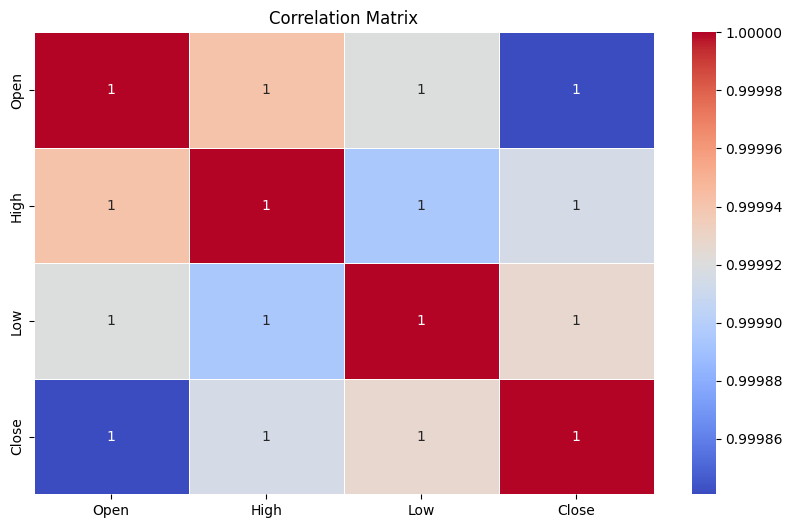

In [11]:
columns = ['Open', 'High', 'Low', 'Close']
correlation_matrix = data[columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Function to preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data[TARGET].values.reshape(-1, 1))
    return scaled_data, scaler

# Preprocess the data
scaled_data, scaler = preprocess_data(data)

In [7]:
# Define the sequence length
seq_length = 10
# Function to create sequences of data
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)


In [8]:
# Split the data into training and testing sets for each model
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - seq_length:]


In [9]:
# Split the data into X_train and y_train for LSTM
X_train_lstm, y_train_lstm = create_sequences(train_data, seq_length), train_data[seq_length:]
X_test_lstm, y_test_lstm = create_sequences(test_data, seq_length), test_data
y_test_lstm = y_test_lstm[seq_length:]

X_test_lstm.shape, y_test_lstm.shape

((1141, 10, 1), (1141, 1))

In [10]:

# Split the data into X_train and y_train for CNN
X_train_cnn, y_train_cnn = create_sequences(train_data, seq_length), train_data[seq_length:]
X_test_cnn, y_test_cnn = create_sequences(test_data, seq_length), test_data
y_test_cnn = y_test_cnn[seq_length:]

X_test_cnn.shape, y_test_cnn.shape

((1141, 10, 1), (1141, 1))

In [11]:
# Split the data into X_train and y_train for Conv1D-LSTM
X_train_conv1d_lstm, y_train_conv1d_lstm = create_sequences(train_data, seq_length), train_data[seq_length:]
X_test_conv1d_lstm, y_test_conv1d_lstm = create_sequences(test_data, seq_length), test_data
y_test_conv1d_lstm = y_test_conv1d_lstm[seq_length:]

X_test_conv1d_lstm.shape, y_test_conv1d_lstm.shape

((1141, 10, 1), (1141, 1))

In [12]:
# Function to build the LSTM model
def build_lstm_model(seq_length):
    model = Sequential()
    model.add(LSTM(50, input_shape=(seq_length, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Build and train the LSTM model
lstm_model = build_lstm_model(seq_length)
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=16)

Epoch 1/10
285/285 [==============================] - 5s 7ms/step - loss: 4.1475e-04
Epoch 2/10
285/285 [==============================] - 2s 8ms/step - loss: 2.3589e-05
Epoch 3/10
285/285 [==============================] - 2s 7ms/step - loss: 2.2812e-05
Epoch 4/10
285/285 [==============================] - 2s 7ms/step - loss: 2.3259e-05
Epoch 5/10
285/285 [==============================] - 3s 11ms/step - loss: 2.2664e-05
Epoch 6/10
285/285 [==============================] - 2s 7ms/step - loss: 2.2308e-05
Epoch 7/10
285/285 [==============================] - 2s 7ms/step - loss: 2.2749e-05
Epoch 8/10
285/285 [==============================] - 2s 6ms/step - loss: 2.0793e-05
Epoch 9/10
285/285 [==============================] - 2s 7ms/step - loss: 1.9093e-05
Epoch 10/10
285/285 [==============================] - 2s 7ms/step - loss: 1.9410e-05


In [13]:
# Function to build the CNN model
def build_cnn_model(seq_length):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Build and train the CNN model
cnn_model = build_cnn_model(seq_length)
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=16)

Epoch 1/10
285/285 [==============================] - 1s 2ms/step - loss: 2.9007e-04
Epoch 2/10
285/285 [==============================] - 1s 2ms/step - loss: 2.8357e-05
Epoch 3/10
285/285 [==============================] - 1s 2ms/step - loss: 3.0042e-05
Epoch 4/10
285/285 [==============================] - 1s 2ms/step - loss: 2.8359e-05
Epoch 5/10
285/285 [==============================] - 1s 2ms/step - loss: 2.1373e-05
Epoch 6/10
285/285 [==============================] - 1s 2ms/step - loss: 2.5132e-05
Epoch 7/10
285/285 [==============================] - 1s 2ms/step - loss: 2.5639e-05
Epoch 8/10
285/285 [==============================] - 1s 2ms/step - loss: 2.2533e-05
Epoch 9/10
285/285 [==============================] - 1s 2ms/step - loss: 2.0675e-05
Epoch 10/10
285/285 [==============================] - 1s 2ms/step - loss: 1.8914e-05


In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [15]:
# Predict
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_cnn = cnn_model.predict(X_test_cnn)


36/36 [==============================] - 0s 1ms/step


In [16]:
lstm_loss = lstm_model.evaluate(X_test_lstm, y_test_lstm)
cnn_loss = cnn_model.evaluate(X_test_cnn, y_test_cnn)


36/36 [==============================] - 0s 3ms/step - loss: 3.2422e-04


In [17]:
# Calculate evaluation metrics for LSTM
lstm_mse = mean_squared_error(y_test_lstm, y_pred_lstm)
lstm_mae = mean_absolute_error(y_test_lstm, y_pred_lstm)
lstm_rmse = np.sqrt(lstm_mse)
lstm_r2 = r2_score(y_test_lstm, y_pred_lstm)
lstm_mape = mean_absolute_percentage_error(y_test_lstm, y_pred_lstm)

print(f"LSTM Model Evaluation Metrics ({TARGET}):")
print(f"LSTM Mean Squared Error (MSE): {lstm_mse:.4f}")
print(f"LSTM Mean Absolute Error (MAE): {lstm_mae:.4f}")
print(f"LSTM Root Mean Squared Error (RMSE): {lstm_rmse:.4f}")
print(f"LSTM R^2 Score: {lstm_r2:.4f}")
print(f"LSTM Mean Absolute Percentage Error (MAPE): {lstm_mape:.4f}")

LSTM Model Evaluation Metrics (Low):
LSTM Mean Squared Error (MSE): 0.0006
LSTM Mean Absolute Error (MAE): 0.0202
LSTM Root Mean Squared Error (RMSE): 0.0247
LSTM R^2 Score: 0.9789
LSTM Mean Absolute Percentage Error (MAPE): 0.0279


In [18]:
# Calculate evaluation metrics for CNN
cnn_mse = mean_squared_error(y_test_cnn, y_pred_cnn)
cnn_mae = mean_absolute_error(y_test_cnn, y_pred_cnn)
cnn_rmse = np.sqrt(cnn_mse)
cnn_r2 = r2_score(y_test_cnn, y_pred_cnn)
cnn_mape = mean_absolute_percentage_error(y_test_cnn, y_pred_cnn)

print(f"CNN Model Evaluation Metrics ({TARGET}):")
print(f"CNN Mean Squared Error (MSE): {cnn_mse:.4f}")
print(f"CNN Mean Absolute Error (MAE): {cnn_mae:.4f}")
print(f"CNN Root Mean Squared Error (RMSE): {cnn_rmse:.4f}")
print(f"CNN R^2 Score: {cnn_r2:.4f}")
print(f"CNN Mean Absolute Percentage Error (MAPE): {cnn_mape:.4f}")


CNN Model Evaluation Metrics (Low):
CNN Mean Squared Error (MSE): 0.0003
CNN Mean Absolute Error (MAE): 0.0135
CNN Root Mean Squared Error (RMSE): 0.0180
CNN R^2 Score: 0.9888
CNN Mean Absolute Percentage Error (MAPE): 0.0199


In [19]:
# Save LSTM model architecture and weights
lstm_model.save("lstm_model.h5")

# Save CNN model architecture and weights
cnn_model.save("cnn_model.h5")



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


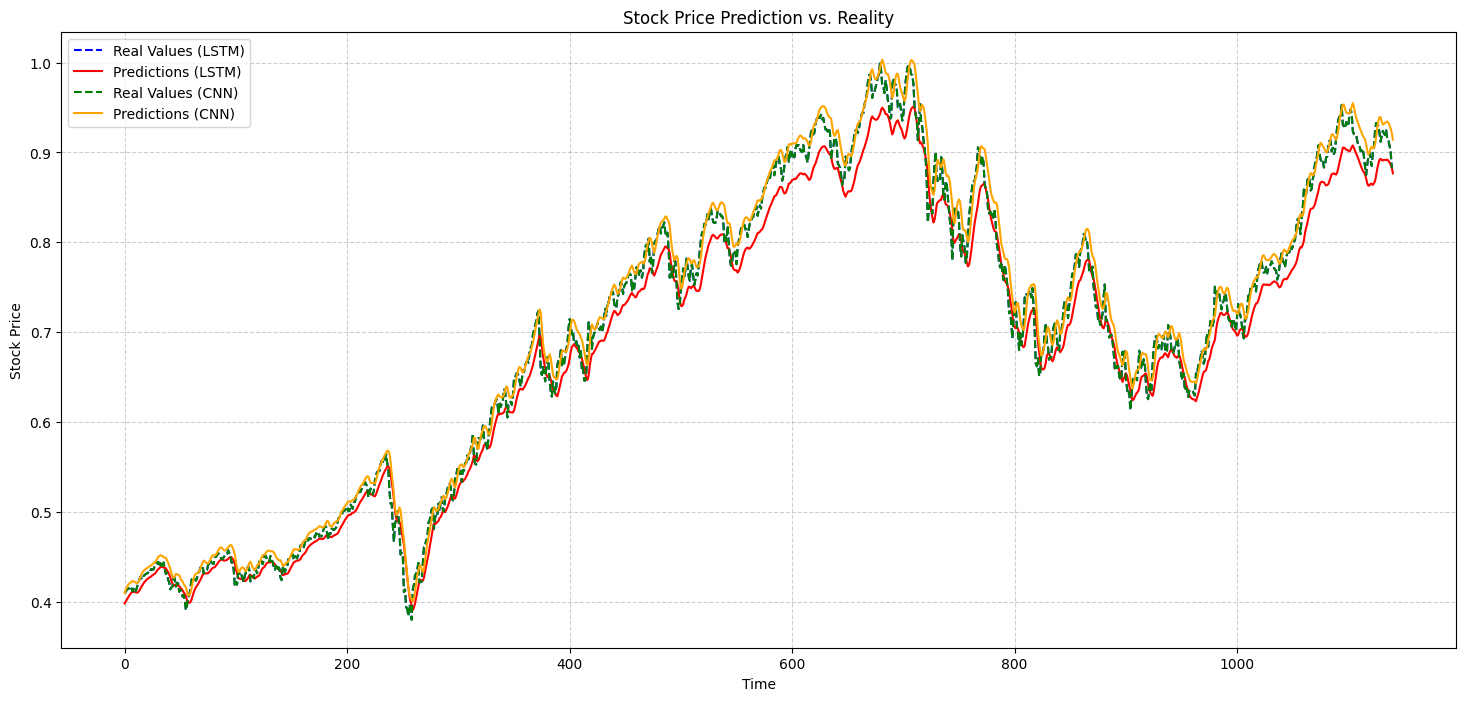

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Create the figure and plot
plt.figure(figsize=(18, 8))
plt.plot(y_test_lstm, label='Real Values (LSTM)', color='blue', linestyle='--')
plt.plot(y_pred_lstm, label='Predictions (LSTM)', color='red')
plt.plot(y_test_cnn, label='Real Values (CNN)', color='green', linestyle='--')
plt.plot(y_pred_cnn, label='Predictions (CNN)', color='orange')


# Grid
plt.grid(True, linestyle='--', alpha=0.6)

# Title with performance metrics
plt.title(f'Stock Price Prediction vs. Reality')

# Axis labels and legend
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()


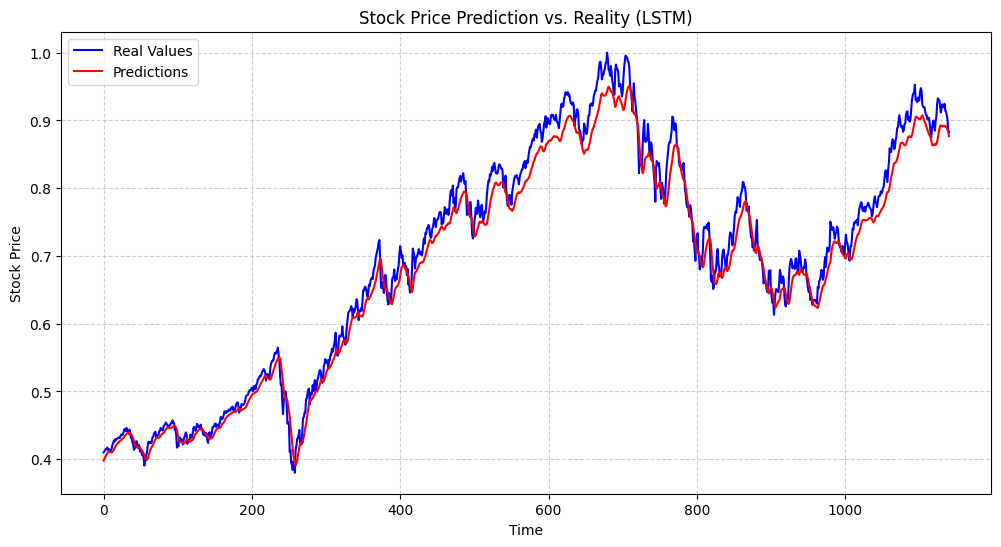

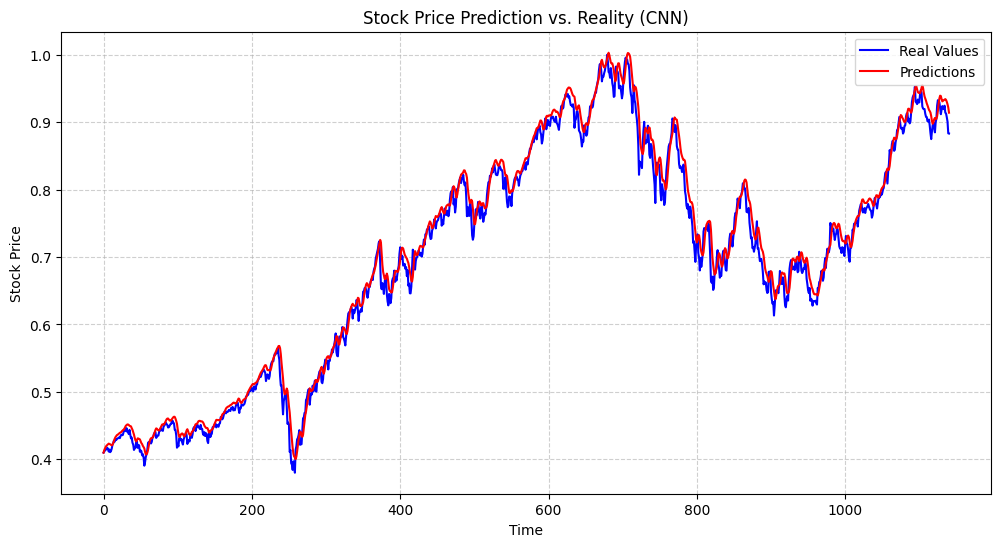

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Create a function for plotting
def plot_results(y_test, y_pred, model_name):

    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label='Real Values', color='blue')
    plt.plot(y_pred, label='Predictions', color='red')

    # Grid
    plt.grid(True, linestyle='--', alpha=0.6)

    # Title with performance metrics
    plt.title(f'Stock Price Prediction vs. Reality ({model_name})')

    # Axis labels and legend
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()

    # Show the plot
    plt.show()

# Plot results for LSTM
plot_results(y_test_lstm, y_pred_lstm, 'LSTM')

# Plot results for CNN
plot_results(y_test_cnn, y_pred_cnn, 'CNN')


